In [27]:
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
X_train = joblib.load('tmp/X_train.pkl')
X_test = joblib.load('tmp/X_test.pkl')

y_train = joblib.load('tmp/y_train.pkl')
y_test = joblib.load('tmp/y_test.pkl')

In [42]:
to_predict = 'Crime Code Description'

# Feature selection
## PCA
- PCA natrenujeme na train a transformujeme train AJ test

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
cmp_X_train = pca.transform(X_train)
cmp_X_test = pca.transform(X_test)

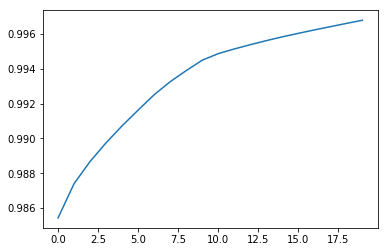

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# feature selection z sklearnu? aka?
# http://scikit-learn.org/stable/modules/feature_selection.html

## ExtraTrees feature selection

- http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
              


In [44]:
lol = list(model.get_support(indices=True))

for f in range(len(lol)):
    print(list(X_train.columns)[f])


Victim Age
Area Name_77th Street
Area Name_Central
Area Name_Devonshire
Area Name_Foothill
Area Name_Harbor
Area Name_Hollenbeck
Area Name_Hollywood
Area Name_Mission
Area Name_N Hollywood
Area Name_Newton
Area Name_Northeast
Area Name_Olympic
Area Name_Pacific
Area Name_Rampart
Area Name_Southeast
Area Name_Southwest
Area Name_Topanga
Area Name_Van Nuys
Area Name_West LA
Area Name_West Valley
Area Name_Wilshire
Time Occurred_night
Time Occurred_morning
Time Occurred_afternoon


In [35]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s \t \t %d (%f)" % (f + 1, list(X_train.columns)[f], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

Feature ranking:
1. Victim Age 	 	 0 (0.552044)
2. Area Name_77th Street 	 	 239 (0.071421)
3. Area Name_Central 	 	 149 (0.013873)
4. Area Name_Devonshire 	 	 23 (0.011391)
5. Area Name_Foothill 	 	 203 (0.011103)
6. Area Name_Harbor 	 	 34 (0.010765)
7. Area Name_Hollenbeck 	 	 35 (0.010551)
8. Area Name_Hollywood 	 	 22 (0.010380)
9. Area Name_Mission 	 	 25 (0.010214)
10. Area Name_N Hollywood 	 	 213 (0.009971)
11. Area Name_Newton 	 	 202 (0.009706)
12. Area Name_Northeast 	 	 33 (0.009509)
13. Area Name_Olympic 	 	 24 (0.009056)
14. Area Name_Pacific 	 	 28 (0.008607)
15. Area Name_Rampart 	 	 32 (0.008578)
16. Area Name_Southeast 	 	 30 (0.007846)
17. Area Name_Southwest 	 	 16 (0.006297)
18. Area Name_Topanga 	 	 13 (0.006253)
19. Area Name_Van Nuys 	 	 170 (0.006244)
20. Area Name_West LA 	 	 8 (0.006196)
21. Area Name_West Valley 	 	 18 (0.005847)
22. Area Name_Wilshire 	 	 5 (0.005783)
23. Time Occurred_night 	 	 11 (0.005765)
24. Time Occurred_morning 	 	 109 (0.005732)
25

# Classification
## kNN
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- http://scikit-learn.org/stable/modules/neighbors.html#classification
- http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

75000:25000 rozdelenie uz splitneho datasetu
All features
- n_neighbors=5  accuracy 0.16
- n_neighbors=15 accuracy 0.22
- n_neighbors=30 accuracy 0.24
- n_neighbors=50 accuracy 0.24

35 top features FULL DATA
- n_neighbors=30 accuracy 0.25 


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform')

In [46]:
knn.fit(X_train_new, y_train) # [:75000]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform')

In [47]:
scores = knn.score(X_test_new, y_test) # [:25000]

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.00)


In [21]:
y_pred = knn.predict(X_test_new)
y_true = y_test # kopia

In [24]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_true, y_pred)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, y_train,
                      title='Confusion matrix, without normalization')
plt.show()

## SVM

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe 

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [16]:
# vytvorime si mapu 
col_names = list(encoded.columns)
index_range = list(range(len(col_names)))
col_map = dict(zip(index_range, col_names))